In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
# Read .csv data
df = pd.read_csv("eg06-01degrees.csv")
df

,Degree,Sex,Count
0,Associate,women,639
1,Bachelor,women,1087
2,Master,women,460
3,Professional or Doctor,women,97
4,Associate,men,402
5,Bachelor,men,804
6,Master,men,329
7,Professional or Doctor,men,87


In [4]:
df_new = pd.DataFrame(np.repeat(df[['Degree','Sex']].values, df.Count, axis = 0), 
                      columns = df[['Degree','Sex']].columns)
df_new

,Degree,Sex
0,Associate,women
1,Associate,women
2,Associate,women
3,Associate,women
4,Associate,women
...,...,...
3900,Professional or Doctor,men
3901,Professional or Doctor,men
3902,Professional or Doctor,men
3903,Professional or Doctor,men


In [5]:
ct = pd.crosstab(index = df_new["Sex"], columns = df_new["Degree"], margins = True)
ct

Degree,Associate,Bachelor,Master,Professional or Doctor,All
Sex,,,,,
men,402,804,329,87,1622
women,639,1087,460,97,2283
All,1041,1891,789,184,3905


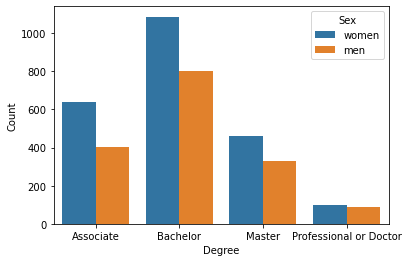

In [6]:
sns.barplot(x = "Degree", hue = "Sex", y = "Count", data = df)
plt.show()

In [7]:
# calculating the proportions of types of degrees conferred conditional on sex 
conditional_sex = pd.crosstab(index = df_new["Sex"], 
                              columns = df_new["Degree"], normalize = 'index')
conditional_sex
#help(pd.crosstab)

Degree,Associate,Bachelor,Master,Professional or Doctor
Sex,,,,
men,0.247842,0.495684,0.202836,0.053637
women,0.279895,0.476128,0.201489,0.042488


In [8]:
# calculating the proportions of men and women conditional on degree type
conditional_degree = pd.crosstab(index = df_new["Sex"], 
                                 columns = df_new["Degree"], normalize = 'columns')
conditional_degree

Degree,Associate,Bachelor,Master,Professional or Doctor
Sex,,,,
men,0.386167,0.425172,0.416984,0.472826
women,0.613833,0.574828,0.583016,0.527174


In [9]:
stacked = conditional_sex.stack().reset_index().rename(columns = {0:'Percentage'})
stacked['Percentage'] = stacked['Percentage']*100
stacked

,Sex,Degree,Percentage
0,men,Associate,24.784217
1,men,Bachelor,49.568434
2,men,Master,20.283600
3,men,Professional or Doctor,5.363748
4,women,Associate,27.989488
5,women,Bachelor,47.612790
6,women,Master,20.148927
7,women,Professional or Doctor,4.248795


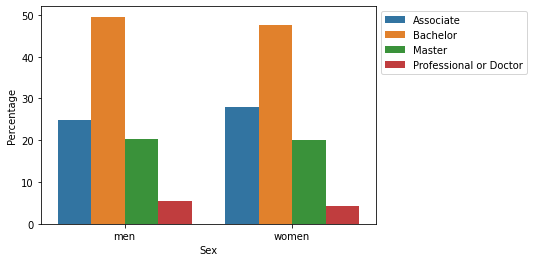

In [10]:
sns.barplot(x = "Sex", hue = "Degree", y = "Percentage", data = stacked)
plt.legend(bbox_to_anchor = (1, 1), loc = 2)
plt.show()

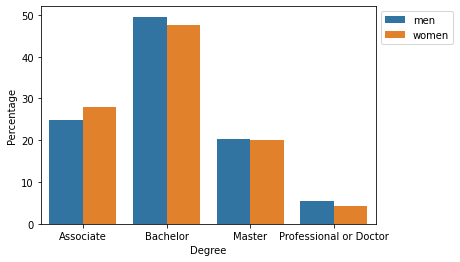

In [11]:
sns.barplot(x = "Degree", hue = "Sex", y = "Percentage", data = stacked)
plt.legend(bbox_to_anchor = (1, 1), loc = 2)
plt.show()

In [13]:
stacked_degree = conditional_degree.stack().reset_index().rename(columns = {0:'Percentage'})
stacked_degree['Percentage'] = stacked_degree['Percentage']*100
stacked

,Sex,Degree,Percentage
0,men,Associate,24.784217
1,men,Bachelor,49.568434
2,men,Master,20.283600
3,men,Professional or Doctor,5.363748
4,women,Associate,27.989488
5,women,Bachelor,47.612790
6,women,Master,20.148927
7,women,Professional or Doctor,4.248795


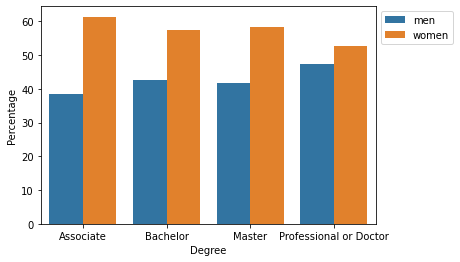

In [14]:
sns.barplot(x = "Degree", hue = "Sex", y = "Percentage", data = stacked_degree)
plt.legend(bbox_to_anchor = (1, 1), loc = 2)
plt.show()

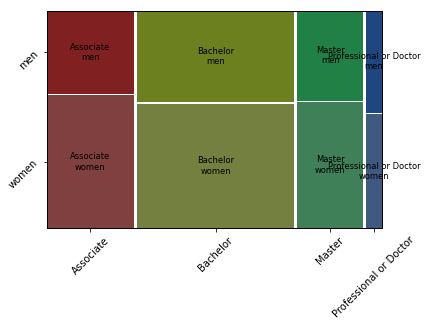

In [12]:
mosaic(df_new, ['Degree', 'Sex'], label_rotation = 45, gap = 0.01)
plt.show()

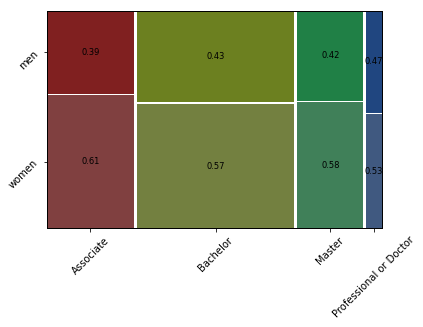

In [13]:
# bonus! trying to make the mosaic plot look better
labelizer = lambda k:{('Associate', 'men'):0.39, ('Bachelor', 'men'):0.43,
                      ('Master', 'men'):0.42, ('Professional or Doctor', 'men'):0.47,
                      ('Associate', 'women'):0.61, ('Bachelor', 'women'):0.57,
                      ('Master', 'women'):0.58, ('Professional or Doctor', 'women'):0.53}[k]
mosaic(df_new, ['Degree', 'Sex'], labelizer = labelizer, label_rotation = 45, gap = 0.01)
plt.show()